1. Implement an Undercomplete Autoencoder

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.2283 - val_loss: 0.0816
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0807 - val_loss: 0.0755
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0756 - val_loss: 0.0728
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0732 - val_loss: 0.0715
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0720 - val_loss: 0.0706
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0710 - val_loss: 0.0701
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0705 - val_loss: 0.0695
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0697 - val_loss: 0.0692
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0695 - val_loss: 0.0686
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0691 - val_loss: 0.0682
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


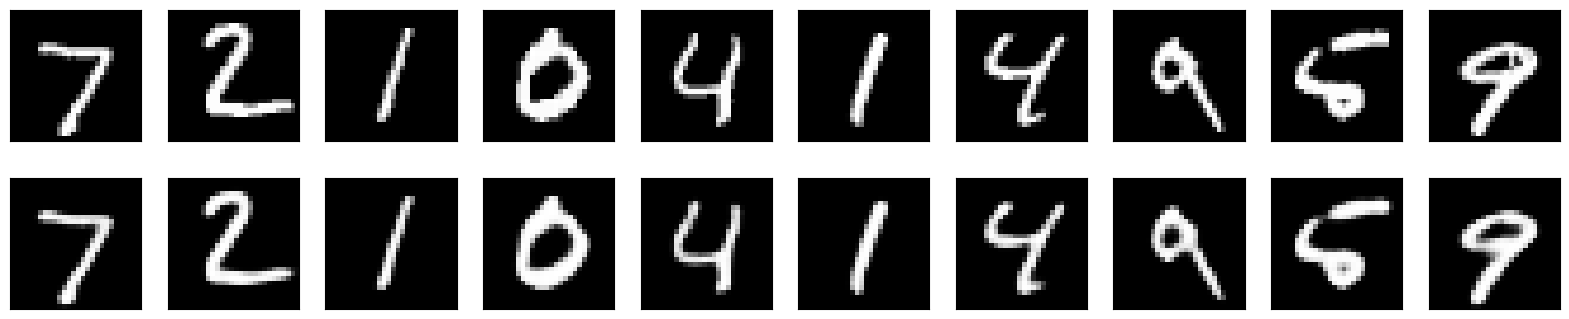

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Define the autoencoder model
input_img = layers.Input(shape=(28,28,1)) # Encoding layer
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same') (input_img)
x = layers.MaxPooling2D((2, 2), padding='same') (x)
x = layers.Conv2D (16, (3, 3), activation='relu', padding='same') (x)
encoded = layers.MaxPooling2D((2, 2), padding='same') (x)

# Decoding layer
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same') (encoded)
x = layers.UpSampling2D((2, 2)) (x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same') (x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D (1, (3, 3), activation='sigmoid', padding='same') (x)

#Build the autoencoder model
autoencoder = models.Model (input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train,
epochs = 10,
batch_size = 128,
shuffle=True,
validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = autoencoder.predict (x_test)

# Display the results
n=10 # Display the first 10 images
plt.figure(figsize = (20,4));
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape (28, 28), cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible (False)
    ax.get_yaxis().set_visible (False)

    # Display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(encoded_imgs[i].reshape (28, 28), cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible (False)
    ax.get_yaxis().set_visible (False)
plt.show()

2. Denoising Autoencoder

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3766 - val_loss: 0.1880
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1788 - val_loss: 0.1539
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1501 - val_loss: 0.1342
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1321 - val_loss: 0.1217
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1209 - val_loss: 0.1129
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1124 - val_loss: 0.1066
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1067 - val_loss: 0.1026
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1028 - val_loss: 0.0991
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0998 - val_loss: 0.0969
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0980 - val_loss: 0.0954
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0964 - val_loss: 0.0945
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

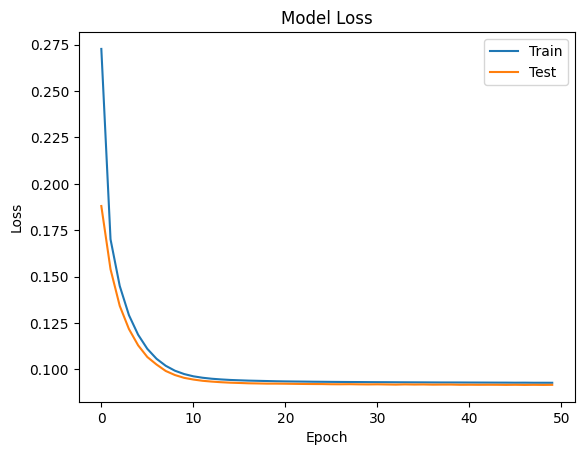

In [ ]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalize the data and reshape it
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape(x_test.shape[0], -1)

# Set the dimensionality of the encoding space
encoding_dim = 32

# Define the input layer
input_img = keras.Input (shape = (784,))

# Define the encoded layer
encoded = keras.layers.Dense (encoding_dim, activation='relu') (input_img)

# Define the decoded layer
decoded = keras.layers.Dense (784, activation='sigmoid') (encoded)

# Define the autoencoder model
autoencoder = keras.Model (input_img, decoded)

# Define the encoder model
encoder = keras.Model (input_img, encoded)

# Define the decoder model
decoder_input = keras.Input (shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model (decoder_input, decoder_layer (decoder_input))

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model
history = autoencoder.fit(x_train, x_train,
epochs = 50,
batch_size = 256,
shuffle=True,
validation_data=(x_test, x_test))

# Encode and decode some digits from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict (encoded_imgs)

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

5. Stacked RBM

In [ ]:
from sklearn.datasets import load_digits
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Load digit dataset
digits = load_digits()
X, y = digits.data, digits.target

# Normalize to [0, 1]
X = X / 16.0

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define RBMs
rbm1 = BernoulliRBM(n_components=64, learning_rate=0.06, n_iter=20, random_state=0)
rbm2 = BernoulliRBM(n_components=32, learning_rate=0.06, n_iter=20, random_state=0)

# Define classifier
logistic = LogisticRegression(max_iter=1500)

# Stack RBMs + classifier
stacked_rbm = Pipeline(steps=[
    ('rbm1', rbm1),
    ('rbm2', rbm2),
    ('logistic', logistic)
])

# Train the model
stacked_rbm.fit(X_train, y_train)

# Predict on test data
y_pred = stacked_rbm.predict(X_test)

# Print classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Print a comparison of actual vs predicted
print("\n--- Comparison of Actual vs Predicted (First 20 samples) ---")
for i in range(20):
    print(f"Sample {i+1}: Actual = {y_test[i]} | Predicted = {y_pred[i]}")


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.73      0.79      0.76        28
           2       0.88      0.85      0.86        33
           3       0.79      0.76      0.78        34
           4       0.96      1.00      0.98        46
           5       0.81      0.72      0.76        47
           6       0.97      0.97      0.97        35
           7       0.81      0.88      0.85        34
           8       0.77      0.57      0.65        30
           9       0.59      0.72      0.65        40

    accuracy                           0.82       360
   macro avg       0.83      0.82      0.82       360
weighted avg       0.83      0.82      0.82       360


--- Comparison of Actual vs Predicted (First 20 samples) ---
Sample 1: Actual = 6 | Predicted = 6
Sample 2: Actual = 9 | Predicted = 9
Sample 3: Actual = 3 | Predicted = 3
Sample 4: Actual = 7 | Predicted = 7


6. Deep Belief Networks for Image Classification

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.13MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 134kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.10MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.20MB/s]


Training...
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Test Accuracy: 97.93%


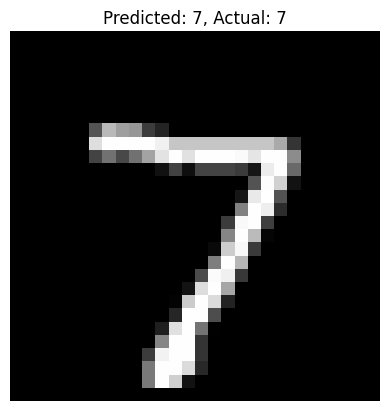

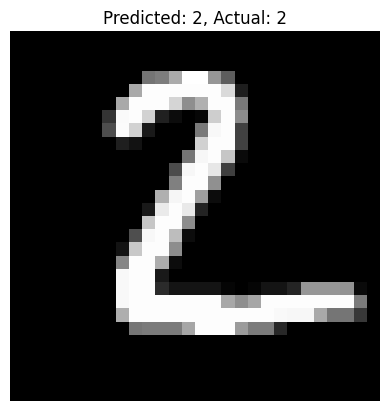

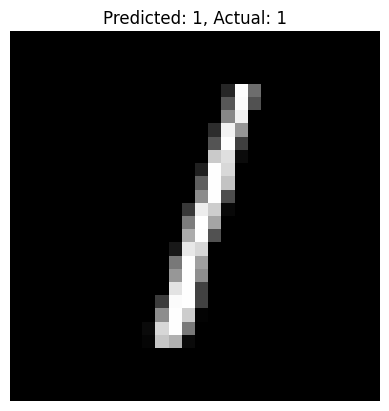

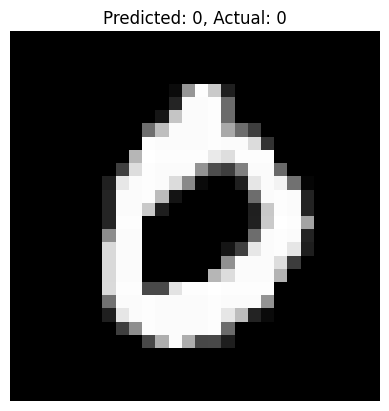

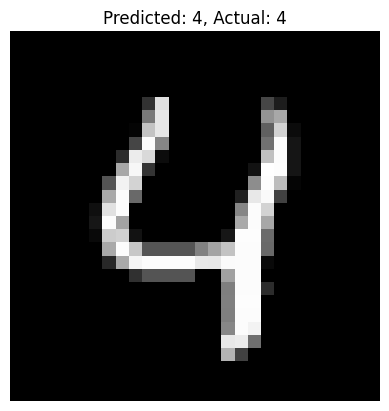

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load MNIST dataset
transform = transforms.ToTensor()
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=1000)

# Simple neural network (DBN-like structure)
class SimpleDBN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28) # flatten the image
        x = F.relu(self.fc1(x)) # first hidden layer
        x = F.relu(self.fc2(x)) # second hidden layer
        return self.fc3(x) # output layer

# Initialize model, loss function and optimizer
model = SimpleDBN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
print("Training...")
for epoch in range(5):
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} complete")

# Test the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Predict and display 5 test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
sample_images = images[:5]
sample_labels = labels[:5]

with torch.no_grad():
    outputs = model(sample_images)
    _, preds = torch.max(outputs, 1)

# Plot predictions
for i in range(5):
    img = sample_images[i].squeeze().numpy()
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {preds[i].item()}, Actual: {sample_labels[i].item()}")
    plt.axis('off')
    plt.show()

7. Implement a Deep Boltzmann Machine (DBM)

In [ ]:
import numpy as np

# Sigmoid activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sampling binary units based on probabilities
def sample(prob):
    return np.random.binomial(1, prob)

# Sampling function for a layer
def sample_layer(input_data, weights, bias):
    activation = np.dot(input_data, weights) + bias
    prob = sigmoid(activation)
    return sample(prob), prob

# One training step for a simplified DBM
def dbm_step(v0, W1, b1, W2, b2, lr=0.01):
    # ======== UPWARD PASS ========
    h1, h1_prob = sample_layer(v0, W1, b1) # From visible to hidden1
    h2, h2_prob = sample_layer(h1, W2, b2) # From hidden1 to hidden2

    # ======== DOWNWARD PASS (Reconstruction) ========
    h1_down, _ = sample_layer(h2, W2.T, np.zeros_like(b1)) # Reconstruct hidden1
    v1, _ = sample_layer(h1_down, W1.T, np.zeros_like(v0)) # Reconstruct visible

    # ======== WEIGHT & BIAS UPDATES (Contrastive Divergence-like) ========
    # Positive phase
    pos_W1 = np.outer(v0, h1)
    pos_W2 = np.outer(h1, h2)

    # Negative phase
    neg_W1 = np.outer(v1, h1_down)
    neg_W2 = np.outer(h1_down, h2)

    # Update weights and biases
    W1 += lr * (pos_W1 - neg_W1)
    W2 += lr * (pos_W2 - neg_W2)
    b1 += lr * (h1 - h1_down)
    b2 += lr * (h2 - h2_prob)

    return W1, b1, W2, b2

# ======== INITIALIZATION ========
np.random.seed(42) # For reproducibility
v0 = np.array([1, 0, 1, 0]) # 4 visible units (input)
W1 = np.random.randn(4, 3) * 0.1 # 4 <-> 3 weights (visible <-> hidden1)
b1 = np.zeros(3)
W2 = np.random.randn(3, 2) * 0.1 # 3 <-> 2 weights (hidden1 <-> hidden2)
b2 = np.zeros(2)

# ======== TRAINING STEP ========
W1, b1, W2, b2 = dbm_step(v0, W1, b1, W2, b2)

# ======== OUTPUT ========
print("Updated W1 (v <-> h1):\n", W1)
print("Updated b1 (h1):", b1)
print("Updated W2 (h1 <-> h2):\n", W2)
print("Updated b2 (h2):", b2)

Updated W1 (v <-> h1):
 [[ 0.05967142 -0.01382643  0.07476885]
 [ 0.15230299 -0.02341534 -0.0234137 ]
 [ 0.16792128  0.07674347 -0.03694744]
 [ 0.054256   -0.05634177 -0.04657298]]
Updated b1 (h1): [0.01 0.   0.01]
Updated W2 (h1 <-> h2):
 [[ 0.03419623 -0.19132802]
 [-0.17249178 -0.05622875]
 [-0.09128311  0.03142473]]
Updated b2 (h2): [ 0.00562073 -0.00446176]


8. Convolutional Autoencoder for Image Compression

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.3207 - val_loss: 0.0889
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0871 - val_loss: 0.0806
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0803 - val_loss: 0.0770
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0773 - val_loss: 0.0755
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0755 - val_loss: 0.0738
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0741 - val_loss: 0.0726
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0729 - val_loss: 0.0717
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0723 - val_loss: 0.0711
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0715 - val_loss: 0.0708
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0710 - val_loss: 0.0701
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0708 - val_loss: 0.0697
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/ste

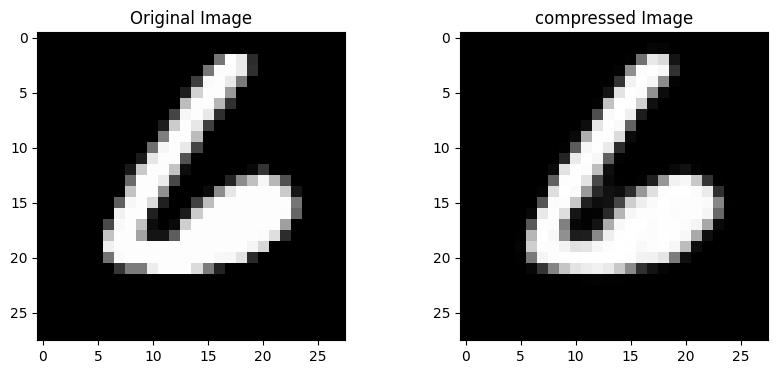

Mean Squared Error (MSE) between original and reconstructed image: 0.0011889744782820344


In [ ]:
#importing library
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

#Loading the dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# reshape in the input data for the model
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

#model implementation
model = Sequential([
    # encoder network
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(2, padding='same'),
    Conv2D(16, 3, activation='relu', padding='same'),
    MaxPooling2D(2, padding='same'),
    # decoder network
    Conv2D(16, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(32, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    # output layer
    Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

#storing the predected output here and visualizing the result
pred = model.predict(x_test)

#Visual Representation
index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))
# display original image
ax = plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
# display compressed image
ax = plt.subplot(1, 2, 2)
plt.title("compressed Image")
plt.imshow(pred[index].reshape(28,28))
plt.gray()
plt.show()

from sklearn.metrics import mean_squared_error
# Get original and predicted images
original = x_test[index].reshape(28, 28)
reconstructed = pred[index].reshape(28, 28)
# Compute Mean Squared Error
mse = mean_squared_error(original, reconstructed)
print(f"Mean Squared Error (MSE) between original and reconstructed image: {mse}")

#9. Generative AI using CNN

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - loss: 0.2810 - val_loss: 0.0940
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0919 - val_loss: 0.0849
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0851 - val_loss: 0.0815
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0818 - val_loss: 0.0795
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0801 - val_loss: 0.0781
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


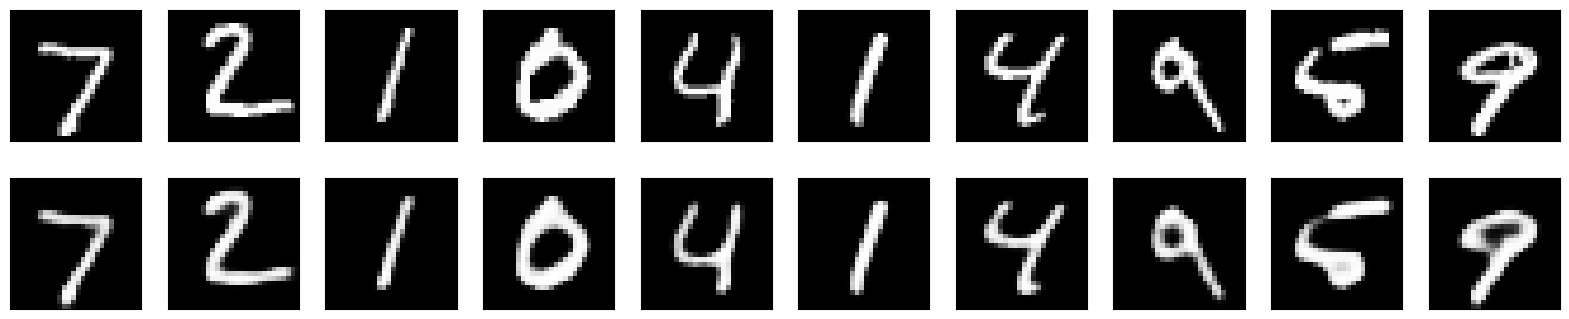

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Load and normalize MNIST
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Define encoder
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Define decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Build autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train, epochs=5, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

# Predict on test set
decoded_imgs = autoencoder.predict(x_test)
n = 10 # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#10. BASIC GAN's

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.12MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 65.7kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.96MB/s]


Epoch 1, Loss D: 0.6909, Loss G: 1.3452
Epoch 2, Loss D: 1.2151, Loss G: 0.9539
Epoch 3, Loss D: 0.9680, Loss G: 1.1912
Epoch 4, Loss D: 0.9794, Loss G: 1.4322
Epoch 5, Loss D: 0.8874, Loss G: 1.1467


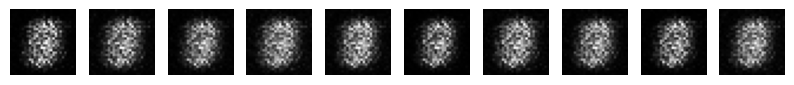

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Data
data = DataLoader(datasets.MNIST('.', train=True, download=True,
    transform=transforms.Compose([transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])),
    batch_size=64, shuffle=True)

# Generator & Discriminator
G = nn.Sequential(nn.Linear(100, 256), nn.ReLU(), nn.Linear(256, 784), nn.Tanh())
D = nn.Sequential(nn.Linear(784, 256), nn.LeakyReLU(0.2), nn.Linear(256, 1), nn.Sigmoid())

opt_G = optim.Adam(G.parameters(), lr=0.0002)
opt_D = optim.Adam(D.parameters(), lr=0.0002)
loss = nn.BCELoss()

# Train
for epoch in range(5): # few epochs for quick training
    for real, _ in data:
        real = real.view(-1, 784)
        z = torch.randn(real.size(0), 100)
        fake = G(z)

        # Discriminator
        D_real = D(real)
        D_fake = D(fake.detach())
        loss_D = loss(D_real, torch.ones_like(D_real)) + loss(D_fake, torch.zeros_like(D_fake))
        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

        # Generator
        D_fake = D(fake)
        loss_G = loss(D_fake, torch.ones_like(D_fake))
        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

    print(f"Epoch {epoch+1}, Loss D: {loss_D.item():.4f}, Loss G: {loss_G.item():.4f}")

# Display generated images
num_samples = 10
z = torch.randn(num_samples, 100)
generated_images = G(z).view(-1, 28, 28).detach().numpy()

plt.figure(figsize=(10, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i], cmap='gray')
    plt.axis('off')
plt.show()